In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import os
from wordcloud import WordCloud
import requests 
import StringIO
import zipfile
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import json
from pandas.io.json import json_normalize

# If this module is not already installed, you may need to install it. 
# You can do this by typing 'pip install seaborn' in the command line
import seaborn as sns 

import sklearn
import sklearn.datasets
import sklearn.cross_validation
import sklearn.decomposition
import sklearn.grid_search
import sklearn.neighbors
import sklearn.metrics

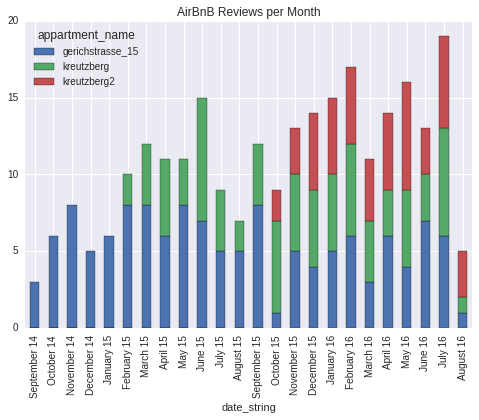

In [2]:
folder_list =['gerichstrasse_15','kreutzberg','kreutzberg2']

def plot_visitors(folder_name):
    reviews_list = []
    root = 'data/'+folder_name
    suffix = '.json'
    
    number_files =  len([name for name in os.listdir(root) if os.path.isfile(os.path.join(root, name))])

    for i in range(1,number_files+1):
        file_to_read = root + '/reviews' + str(i) + suffix
        with open(file_to_read) as datafile:
            comments_dict = json.load(datafile)
            reviews_list +=(comments_dict['reviews'])


    reviews_list = json_normalize(reviews_list)
    df = pd.DataFrame(reviews_list)
    df['date']= pd.to_datetime(df.localized_date)
    df['date_string'] = df.date.apply(lambda x : x.strftime('%B %y'))
    df['appartment_name'] = folder_name

   

    return df
    

df_list =[]
for fold in folder_list:
    df = plot_visitors(fold)
    df_list.append(df)
    

df_final = pd.concat(df_list,axis=0)
df_final = df_final.sort_values(by='date', ascending=True)

groupy_date = df_final.groupby(['date','date_string','appartment_name'],sort=True).count()
groupy_date.head()



groupy_date = groupy_date.unstack('appartment_name')
groupy_date.head()
groupy_date= groupy_date.reset_index('date')
groupy_date.comments.plot(kind='bar',stacked = True, title='AirBnB Reviews per Month')

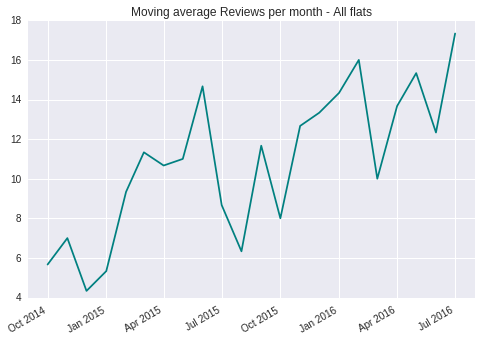

In [3]:
rolling_mean = df_final['date'].value_counts().sort_values()
rolling_mean = rolling_mean.rolling(window=3).mean()
rolling_mean.plot(title="Moving average Reviews per month - All flats",color = '#008080')

(-0.5, 399.5, 199.5, -0.5)

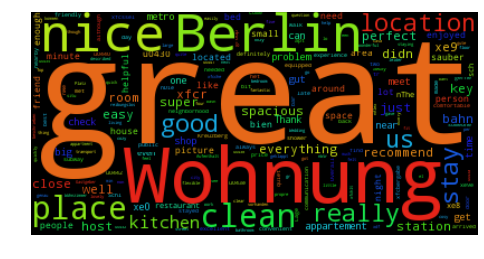

In [8]:
texto = df_final[['comments']].apply(lambda x: ''.join(x), axis=0)
texto= str(texto.values)
type(texto)

from stop_words import get_stop_words

stop_words_en = get_stop_words('en')
stop_words_fr = get_stop_words('fr')
stop_words_de = get_stop_words('de')

custom_stop_words = ['apartment','Alex','alex','flat','Berlin']
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words_en+stop_words_fr+stop_words_de+custom_stop_words).generate(texto)

# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud)
plt.axis("off")


In [ ]:
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5, stopwords=['Alex']).generate(texto)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()